In [1]:
#workshop 1

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [3]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
digits.data.shape

(1797, 64)

In [6]:
digits.images.shape

(1797, 8, 8)

In [7]:
digits.images[:2]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]])

In [8]:
digits.target.shape

(1797,)

In [9]:
digits.target[:40]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9])

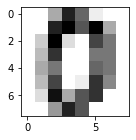

In [10]:
img = digits['images'][0]
plt.figure(figsize=(2, 2))
plt.imshow(img, cmap=plt.cm.gray_r)
plt.show()

In [11]:
def visual_multi(i):
    nplots = 40
    fig = plt.figure(figsize=(8, 4))
    for j in range(nplots):
        plt.subplot(4, 10, j+1)
        plt.imshow(digits.images[i+j])
        plt.title(digits.target[i+j])
    plt.show()

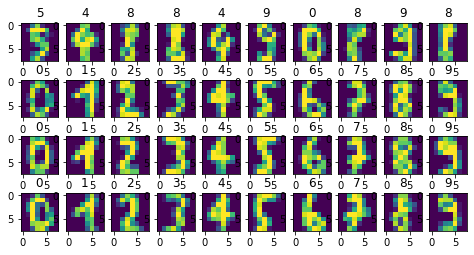

In [12]:
visual_multi(120)

In [13]:
n_sample = len(digits.images)
n_sample

1797

In [14]:
X = digits.images.reshape(n_sample, -1)
X[:1]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [15]:
y = digits.target
y[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
digits.data[:1]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

In [19]:
X_train.shape, X_test.shape

((1078, 64), (719, 64))

In [20]:
from sklearn.svm import SVC

In [21]:
model = SVC(gamma='scale')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
y_pred = model.predict(X_test)
y_pred[:20]

array([0, 7, 9, 5, 8, 1, 3, 3, 7, 0, 9, 4, 7, 4, 0, 1, 1, 8, 1, 3])

In [23]:
y_test[:20]

array([0, 7, 9, 5, 8, 1, 3, 3, 7, 0, 9, 4, 7, 4, 0, 1, 1, 8, 1, 3])

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
print('accuracy_score: {:.4f}'.format(accuracy_score(y_test, y_pred)))

accuracy_score: 0.9819


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        63
           3       1.00      0.95      0.97        80
           4       1.00      0.99      0.99        75
           5       0.96      0.99      0.97        71
           6       1.00      0.99      0.99        71
           7       0.95      0.99      0.97        80
           8       0.94      1.00      0.97        64
           9       0.97      0.94      0.95        77

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719



In [27]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[63  0  0  0  0  0  0  0  0  0]
 [ 0 75  0  0  0  0  0  0  0  0]
 [ 0  0 63  0  0  0  0  0  0  0]
 [ 0  0  0 76  0  1  0  1  2  0]
 [ 0  0  0  0 74  0  0  0  1  0]
 [ 0  0  0  0  0 70  0  0  0  1]
 [ 0  0  0  0  0  1 70  0  0  0]
 [ 0  0  0  0  0  0  0 79  0  1]
 [ 0  0  0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  1  0  3  1 72]]


In [28]:
import scikitplot as skplot

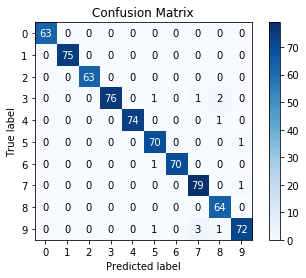

In [29]:
skplot.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

In [30]:
idx_miss = np.where(y_test != y_pred)
idx_miss

(array([ 98, 111, 268, 338, 351, 427, 434, 449, 470, 523, 562, 638, 657]),)

In [31]:
y_test[idx_miss]

array([9, 5, 3, 4, 9, 3, 6, 7, 3, 3, 9, 9, 9])

In [32]:
y_pred[idx_miss]

array([8, 9, 8, 8, 5, 5, 5, 9, 7, 8, 7, 7, 7])

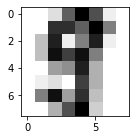

In [34]:
fig = plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_miss][0].reshape(8, 8), cmap=plt.cm.gray_r)

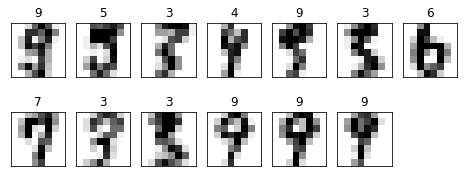

In [35]:
fig = plt.figure(figsize=(8, 3))
for j, k in enumerate(idx_miss[0]):
    plt.subplot(2, 7, j+1)
    plt.imshow(X_test[k].reshape(8, 8), cmap=plt.cm.gray_r)
    plt.title(y_test[k])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [36]:
#workshop 6

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [43]:
model = SVC(gamma='scale')

In [44]:
cvs = cross_val_score(model, X, y, cv=10)
print(cvs.round(4))
print('Mean: {}'.format(cvs.mean().round(4)))

[0.9459 0.9891 0.9337 0.9833 0.9832 0.9888 0.9888 0.9944 0.9605 0.9545]
Mean: 0.9722


In [45]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
model = DecisionTreeClassifier()

In [48]:
cvs = cross_val_score(model, X, y, cv=10)
print(cvs.round(4))
print('Mean: {}'.format(cvs.mean().round(4)))

[0.7838 0.8415 0.8287 0.7889 0.7933 0.8715 0.8827 0.7921 0.8531 0.8239]
Mean: 0.826


In [49]:
#workshop 8

In [50]:
from PIL import Image, ImageOps

In [52]:
model = SVC(gamma='scale')
model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
image_file = '/Users/apple/Desktop/my_machine_learning/digits_img/n_5.png'

In [78]:
img = Image.open(image_file).convert('L')
img = ImageOps.invert(img)

In [79]:
img = img.resize((8, 8), Image.ANTIALIAS)
pixel = np.array(img)
pixel = pixel / 255.0 * 16
pixel = pixel.astype('int')

In [80]:
my_digit = pixel.reshape(1, -1)
predicted = model.predict(my_digit)

In [81]:
predicted

array([9])